In [1]:
import json
import re
import csv
import requests

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dataframe = pd.read_csv('projectdata.csv',sep = ",", header = 0)
dataframe.head()

,Year,CauseName113,CauseName,State,Deaths,AgeadjustedDeathRate
0,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alabama,2313,52.2
1,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Alaska,294,55.9
2,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arizona,2214,44.8
3,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,Arkansas,1287,47.6
4,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional Injuries,California,9198,28.7


In [5]:
causedata = dataframe['Year'].value_counts(sort=True)

In [6]:
total_Deaths = dataframe['Deaths'].sum()
total_Deaths

153622150

In [7]:
cause_death = pd.DataFrame(dataframe.groupby('CauseName')['Deaths'].sum())
year_death = pd.DataFrame(dataframe.groupby('Year')['Deaths'].sum())
state_death = pd.DataFrame(dataframe.groupby('State')['Deaths'].sum())

In [38]:
c = pd.DataFrame(columns=['cause','death'])
y = pd.DataFrame(columns=['year','death'])
s = pd.DataFrame(columns=['state','death'])

In [13]:
cause_death.head()

,Deaths
CauseName,
All Causes,84341636
Alzheimer's disease,2514618
CLRD,4560260
Cancer,19292996
Chronic liver disease and cirrhosis,1043674


In [34]:
causes = cause_death.index.tolist()
years = year_death.index.tolist()
states = state_death.index.tolist()

In [39]:
for i in range(0,cause_death.shape[0]):
    per = ((cause_death.iloc[i])['Deaths']*100)/total_Deaths
    c.loc[i] = [causes[i],per]

In [40]:
for i in range(0,year_death.shape[0]):
    per = ((year_death.iloc[i])['Deaths']*100)/total_Deaths
    y.loc[i] = [years[i],per]

In [41]:
for i in range(0,state_death.shape[0]):
    per = ((state_death.iloc[i])['Deaths']*100)/total_Deaths
    s.loc[i] = [states[i],per]

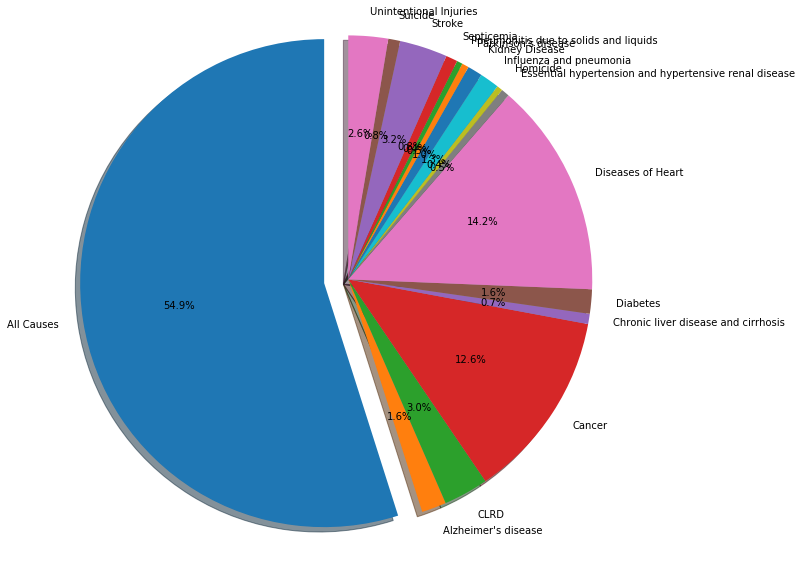

In [57]:
#cause
dc=c['death'].tolist()
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(dc, explode=explode, labels=causes, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.savefig('cause.png')

plt.show()

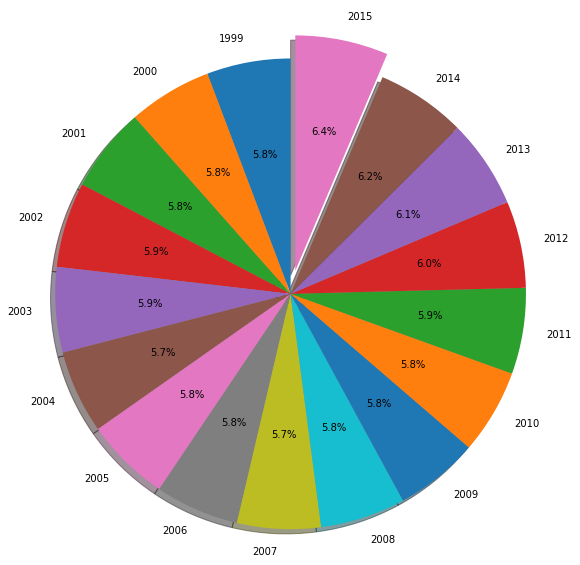

In [58]:
#year
dy=y['death'].tolist()
explode = (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1)

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(dy, explode=explode, labels=years, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.savefig('death.png')
plt.show()

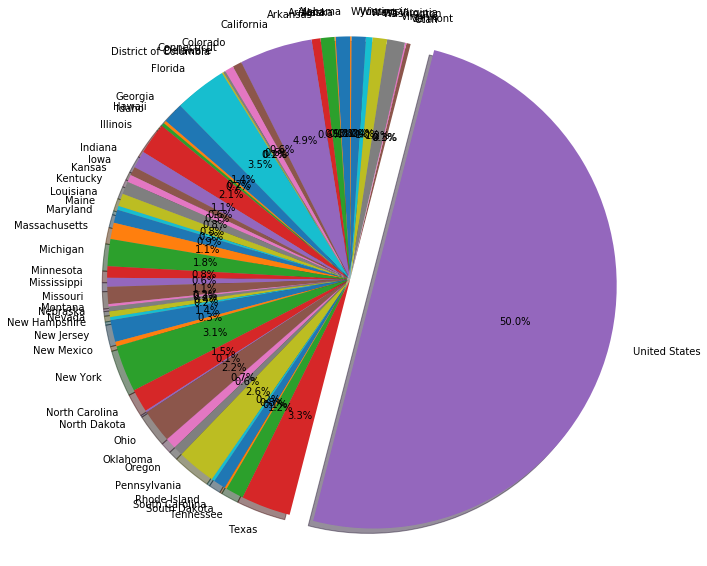

In [59]:
#year
ds=s['death'].tolist()
explode = (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0,0,0,0,0,0,0)

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(ds, explode=explode, labels=states, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.savefig('state.png')
plt.show()

In [ ]:
input_file = 'projectdata.csv'

csv_file = pd.DataFrame(pd.read_csv(input_file, sep = ",", header = 0, index_col = False))
csv_file.to_json("projectdata.json",orient = "records",date_format = "epoch",double_precision = 10, 
                 force_ascii = True,date_unit = "ms",default_handler = None)

In [ ]:
data = json.load(open("projectdata.json"))
requests.put('https://inf551-8d68c.firebaseio.com/full.json', json=data)

In [1]:
data = json.load(open("projectdata.json"))

state ={}

for node in data:
    st = node.get('State')
    state[st] = []

In [2]:
for node in data:
    for key,values in state.items():
        if key == node.get('State'):
            values.append(node)


In [3]:
with open('state.json', 'w') as fp:
    json.dump(state, fp)

In [4]:


data_state = json.load(open("state.json"))
response = requests.put('https://inf551-8d68c.firebaseio.com/state.json', json=data_state)

In [9]:
response = requests.put('https://inf551-8d68c.firebaseio.com/contactus.json',json="")
response

<Response [200]>

In [8]:
response = requests.put('https://inf551-8d68c.firebaseio.com/userdata.json',json="")
response

<Response [200]>